# Regressão Logística

## Dataset de Previsão e Detecção de Risco de Crédito

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [5]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [6]:
df.columns[1:]

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [7]:
len(df.columns[1:])

20

In [8]:
len(df)

1000

## Análise Exploratória

In [9]:
# variavél target ou classe
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [11]:
df.describe()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.292000,2.965000,3271.24800,1.874000,2.44600,2.973000,2.372000,...,2.845000,2.358000,35.54200,1.814000,1.928000,1.367000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,0.620581,0.971967,2822.75176,1.196476,1.10558,1.118715,1.067125,...,1.103718,1.050209,11.35267,0.389301,0.530186,0.482228,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,1.000000,1.000000,250.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,2.000000,1365.50000,1.000000,2.00000,2.000000,1.000000,...,2.000000,1.000000,27.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,3.000000,2319.50000,1.000000,2.00000,3.000000,3.000000,...,3.000000,2.000000,33.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.25000,3.000000,4.00000,4.000000,3.000000,...,4.000000,3.000000,42.00000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,3.000000,4.000000,18424.00000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,75.00000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000


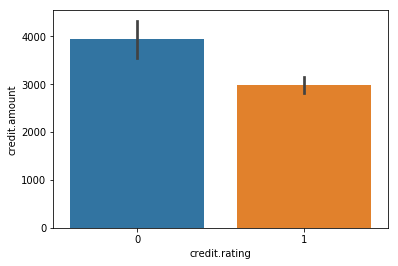

In [12]:
import seaborn as sns
sns.barplot(x='credit.rating',y='credit.amount', data=df)

/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


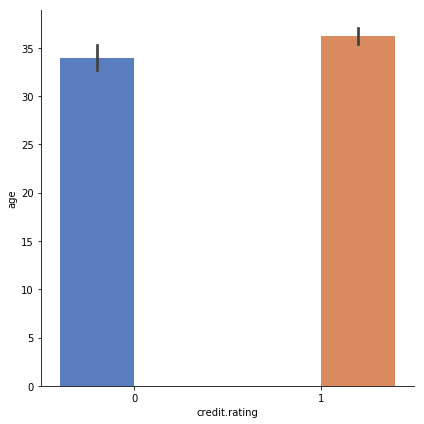

In [13]:
sns.factorplot(x='credit.rating', y='age', hue='credit.rating', data=df,
                   size=6, kind="bar", palette="muted")

In [14]:
df.age.mean()

35.542

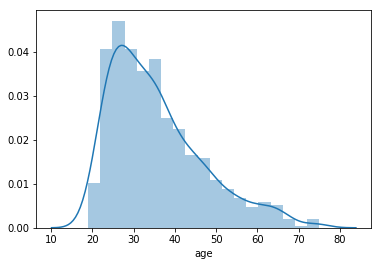

In [15]:
sns.distplot(df.age)

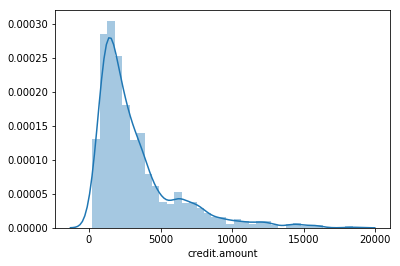

In [20]:
sns.distplot(df['credit.amount']) # quantidade de crédito

## Definindo X e Y

In [21]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [22]:
X = df.iloc[:,1:].values.astype(float)
y = df.iloc[:,0]

In [26]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [27]:
X[:3]

array([[   1.,   18.,    3.,    2., 1049.,    1.,    1.,    4.,    1.,
           1.,    4.,    2.,   21.,    2.,    1.,    1.,    3.,    1.,
           1.,    1.],
       [   1.,    9.,    3.,    4., 2799.,    1.,    2.,    2.,    3.,
           1.,    2.,    1.,   36.,    2.,    1.,    2.,    3.,    2.,
           1.,    1.],
       [   2.,   12.,    2.,    4.,  841.,    2.,    3.,    2.,    1.,
           1.,    4.,    1.,   23.,    2.,    1.,    1.,    2.,    1.,
           1.,    1.]])

In [28]:
y[:3]

0    1
1    1
2    1
Name: credit.rating, dtype: int64

## Preparando os dados para aplicar Regressão Logistica<br />
## Colocando os dados em Escala

In [29]:
X.shape

(1000, 20)

In [30]:
standardization  = StandardScaler().fit(X)
Xst = standardization.transform(X)

print('Dataset Original')
X[:5].astype(int)

Dataset Original


array([[   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1],
       [   1,    9,    3,    4, 2799,    1,    2,    2,    3,    1,    2,
           1,   36,    2,    1,    2,    3,    2,    1,    1],
       [   2,   12,    2,    4,  841,    2,    3,    2,    1,    1,    4,
           1,   23,    2,    1,    1,    2,    1,    1,    1],
       [   1,   12,    3,    4, 2122,    1,    2,    3,    3,    1,    2,
           1,   39,    2,    1,    2,    2,    2,    1,    2],
       [   1,   12,    3,    4, 2171,    1,    2,    4,    3,    1,    4,
           2,   38,    1,    2,    2,    2,    1,    1,    2]])

In [31]:
print('Dataset Em Escala')
Xst[:5]

Dataset Em Escala


array([[-1.4165, -0.2409,  1.1414, -0.9933, -0.7877, -0.7308, -1.3086,
         0.9185, -1.2863, -0.3202,  1.047 , -0.3411, -1.2816,  0.478 ,
        -1.7512, -0.7614,  0.1469, -0.4283, -0.8233, -0.196 ],
       [-1.4165, -0.9876,  1.1414,  1.0654, -0.1674, -0.7308, -0.4036,
        -0.8702,  0.5888, -0.3202, -0.766 , -1.2937,  0.0404,  0.478 ,
        -1.7512,  1.3133,  0.1469,  2.3349, -0.8233, -0.196 ],
       [-0.2191, -0.7387, -0.4708,  1.0654, -0.8614,  0.1054,  0.5013,
        -0.8702, -1.2863, -0.3202,  1.047 , -1.2937, -1.1053,  0.478 ,
        -1.7512, -0.7614, -1.3838, -0.4283, -0.8233, -0.196 ],
       [-1.4165, -0.7387,  1.1414,  1.0654, -0.4073, -0.7308, -0.4036,
         0.0241,  0.5888, -0.3202, -0.766 , -1.2937,  0.3048,  0.478 ,
        -1.7512,  1.3133, -1.3838,  2.3349, -0.8233,  5.1017],
       [-1.4165, -0.7387,  1.1414,  1.0654, -0.39  , -0.7308, -0.4036,
         0.9185,  0.5888, -0.3202,  1.047 , -0.3411,  0.2166, -2.092 ,
         0.1359,  1.3133, -1.3838, -0.

## Aplicando o Algoritmo

In [32]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(Xst, y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Avaliando A Acurácia do Modelo

In [33]:
# check the accuracy on the training set
model.score(Xst, y)

0.775

### Examinando os Coeficientes

In [34]:
cols = df.columns.values
cols

array(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [35]:
cols_atributos = cols[1:]
cols_atributos

array(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [36]:
len(cols_atributos)

20

In [37]:
model.coef_[0]

array([ 0.6706, -0.2767,  0.3611, -0.3578, -0.3075,  0.3676,  0.2054,
       -0.2925,  0.2004,  0.0943, -0.0396, -0.2442,  0.099 ,  0.1417,
        0.149 , -0.0879, -0.0304, -0.0536,  0.1669,  0.2456])

In [38]:
len(model.coef_[0])

20

In [39]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['account.balance', 0.6706422196200341],
 ['credit.duration.months', -0.27669158436952523],
 ['previous.credit.payment.status', 0.3611194071799875],
 ['credit.purpose', -0.3577791330647178],
 ['credit.amount', -0.30747000821433057],
 ['savings', 0.36762450373956423],
 ['employment.duration', 0.2053668963550472],
 ['installment.rate', -0.29253094669308655],
 ['marital.status', 0.20036285645183424],
 ['guarantor', 0.09426169574848973],
 ['residence.duration', -0.03960406900848037],
 ['current.assets', -0.24420229425865883],
 ['age', 0.09899829241768389],
 ['other.credits', 0.1417096742671957],
 ['apartment.type', 0.14903121150883666],
 ['bank.credits', -0.08787836059911988],
 ['occupation', -0.030444834205835315],
 ['dependents', -0.053602809318327733],
 ['telephone', 0.1668626254690643],
 ['foreign.worker', 0.24558816698411934]]

In [40]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'Coeficiente'])

,Atributo,Coeficiente
0,account.balance,0.670642
1,credit.duration.months,-0.276692
2,previous.credit.payment.status,0.361119
3,credit.purpose,-0.357779
4,credit.amount,-0.307470
5,savings,0.367625
6,employment.duration,0.205367
7,installment.rate,-0.292531
8,marital.status,0.200363
9,guarantor,0.094262


## Avaliando o modelo usando split de dados

In [41]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xst, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# predict class labels for the test set
y_predicted = model2.predict(X_test)
print (y_predicted[:5])

[1 0 1 1 0]


In [43]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.3461 0.6539]
 [0.5058 0.4942]
 [0.1349 0.8651]
 [0.0987 0.9013]
 [0.503  0.497 ]]


In [44]:
print('Valores Previstos e suas Probalidades')
elementos = [[x,y] for x, y in zip(y_predicted,probs)]
elementos
df2 = pd.DataFrame(elementos, columns=['Classe', 'Probabilidade'])
df2.head(10)

Valores Previstos e suas Probalidades


,Classe,Probabilidade
0,1,"[0.3461401531509519, 0.6538598468490481]"
1,0,"[0.5057661375308897, 0.4942338624691102]"
2,1,"[0.13488830921011474, 0.8651116907898853]"
3,1,"[0.09869361786030684, 0.9013063821396932]"
4,0,"[0.503048353413627, 0.496951646586373]"
5,0,"[0.5962526750232171, 0.40374732497678284]"
6,1,"[0.0632676485917445, 0.9367323514082555]"
7,1,"[0.14762673286171524, 0.8523732671382848]"
8,1,"[0.12703997138673007, 0.8729600286132699]"
9,1,"[0.09170745759387333, 0.9082925424061267]"


In [45]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, y_predicted))

Acurácia:  0.7466666666666667


## Plotando a curva ROC

In [46]:
print ('Curva ROC: ',metrics.roc_auc_score(y_test, probs[:, 1]))

Curva ROC:  0.7920000000000001


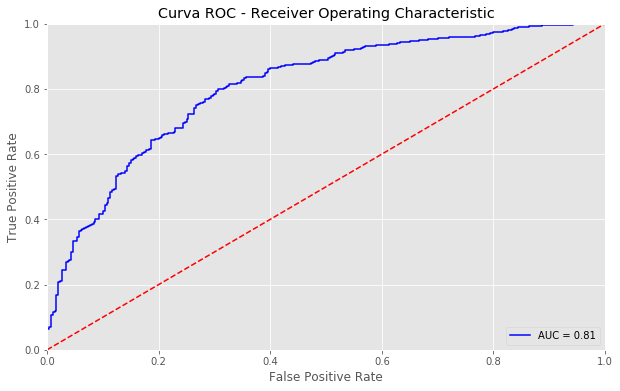

In [47]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(Xst)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Curva ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

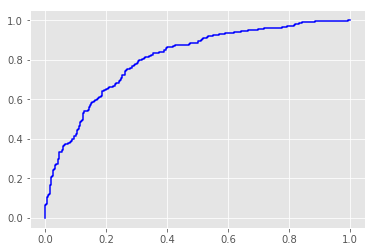

In [48]:
# method II: ggplot
#import ggplot 
dfggplot = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
dfggplot
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#ggplot(dfggplot, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
#!pip install ggplot

In [50]:
print ("Matriz de Confusão:\n",metrics.confusion_matrix(y_test, y_predicted))
print ("\nMétricas Relacionadas:\n",metrics.classification_report(y_test, y_predicted))

Matriz de Confusão:
 [[ 40  60]
 [ 16 184]]

Métricas Relacionadas:
               precision    recall  f1-score   support

           0       0.71      0.40      0.51       100
           1       0.75      0.92      0.83       200

   micro avg       0.75      0.75      0.75       300
   macro avg       0.73      0.66      0.67       300
weighted avg       0.74      0.75      0.72       300



## Avaliando o modelo usando Cross-validation

In [52]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

modelo = LogisticRegression()

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)
resultado = model_selection.cross_val_score(modelo, Xst, y, cv = kfold, 
                                            scoring='accuracy')

# Print do resultado
print("Accuracy: %.3f (%.3f)" % (resultado.mean(), resultado.std()))
print(resultado)

Accuracy: 0.761 (0.029)
[0.76 0.76 0.8  0.75 0.71 0.75 0.78 0.78 0.72 0.8 ]


## Importância dos Atributos

## Seleção Univariada
Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever.<br/> O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos.<br /><br /> Vamos usar o teste estatístico do qui-quadrado. 
Este teste serve para avaliar quantitativamente a relação entre o resultado de um experimento e a distribuição esperada para o fenômeno. Isto é, ele nos diz com quanta certeza os valores observados podem ser aceitos como regidos pela teoria em questão.<br /> Vamos selecionar os 6 melhores atributos que podem ser usados como variáveis preditoras.<br />

Veremos abaixo o score para cada atributo e os6atributos com maior score e que portanto devem ser selecionados como variáveis preditoras.

In [53]:
# Extração de Variáveis com Testes Estatísticos Univariados (Teste qui-quadrado)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Extração de Variáveis
#features = fit.transform(Xst)
test = SelectKBest(score_func = chi2, k = 6)
fit = test.fit(X, y)

tuplas = []
for coef, var in sorted(zip(map(abs, fit.scores_), df.columns[1:]), reverse = True):
    #print ("%6.3f %s" % (coef,var))
    tuplas.append([var,coef])

dfsu = pd.DataFrame(tuplas, columns=['Atributo','Importância'])
dfsu

,Atributo,Importância
0,credit.amount,58264.415475
1,credit.duration.months,321.030795
2,account.balance,36.808259
3,age,30.178268
4,savings,24.503837
5,current.assets,9.503534
6,previous.credit.payment.status,8.141694
7,employment.duration,6.961881
8,marital.status,3.993335
9,credit.purpose,3.623625


### colocar em Escala

In [54]:
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, model)
Stand_coef_linear_reg.fit(X,y)
tuplas = []
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_[0]), df.columns[1:]), reverse = True):
    print ("%6.3f %s" % (coef,var))
    tuplas.append([var,coef])

 0.671 account.balance
 0.368 savings
 0.361 previous.credit.payment.status
 0.358 credit.purpose
 0.307 credit.amount
 0.293 installment.rate
 0.277 credit.duration.months
 0.246 foreign.worker
 0.244 current.assets
 0.205 employment.duration
 0.200 marital.status
 0.167 telephone
 0.149 apartment.type
 0.142 other.credits
 0.099 age
 0.094 guarantor
 0.088 bank.credits
 0.054 dependents
 0.040 residence.duration
 0.030 occupation


In [55]:
dfsu = pd.DataFrame(tuplas, columns=['Atributo','Importância'])
dfsu

,Atributo,Importância
0,account.balance,0.670642
1,savings,0.367625
2,previous.credit.payment.status,0.361119
3,credit.purpose,0.357779
4,credit.amount,0.307470
5,installment.rate,0.292531
6,credit.duration.months,0.276692
7,foreign.worker,0.245588
8,current.assets,0.244202
9,employment.duration,0.205367


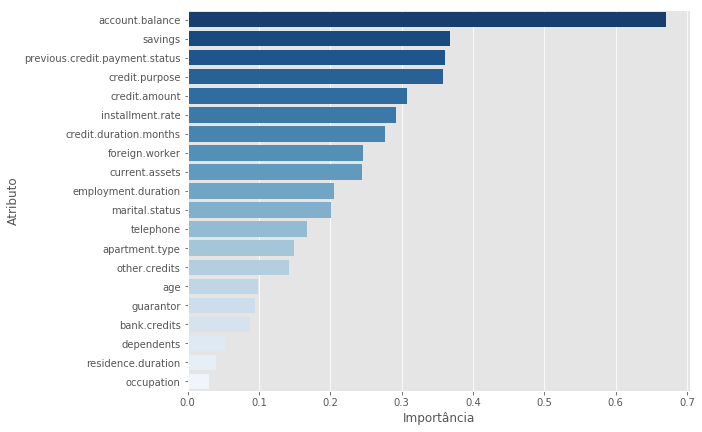

In [56]:
fig = plt.figure(figsize=(9,7))
fig.add_subplot(1,1,1)
plt.style.use('ggplot')
palette = 'Blues_r'
sns.barplot(y='Atributo',x='Importância', data=dfsu, palette=palette)
plt.show()

## Eliminação Recursiva de Atributos
Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. Em inglês esta técnia é chamada Recursive Feature Elimination (RFE).

O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de Regressão Logística para selecionar as 10 melhores variáveis preditoras. O RFE selecionou as variáveis account.balance, current.assets, savings, foreign.worker, previous.credit.payment.status	e credit.purpose, que estão marcadas como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos".

In [57]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)

# Print dos resultados
print("Número de Atributos: %d" % fit.n_features_)
#print(df.columns[1:])
print("Atributos Selecionados: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print(df.columns[1:])

Número de Atributos: 6
Atributos Selecionados: [ True False  True  True False  True False False False False False  True
 False False False False False False False  True]
Ranking dos Atributos: [ 1 12  1  1 15  1  4  8  9 11 13  1 14  5  2  3  6 10  7  1]
Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')


In [58]:
dfrfe = pd.DataFrame()
dfrfe['atributo'] = df.columns[1:]
dfrfe['ranking'] = fit.ranking_
dfrfe = dfrfe.sort_values('ranking')
dfrfe

,atributo,ranking
0,account.balance,1
11,current.assets,1
5,savings,1
19,foreign.worker,1
2,previous.credit.payment.status,1
3,credit.purpose,1
14,apartment.type,2
15,bank.credits,3
6,employment.duration,4
13,other.credits,5


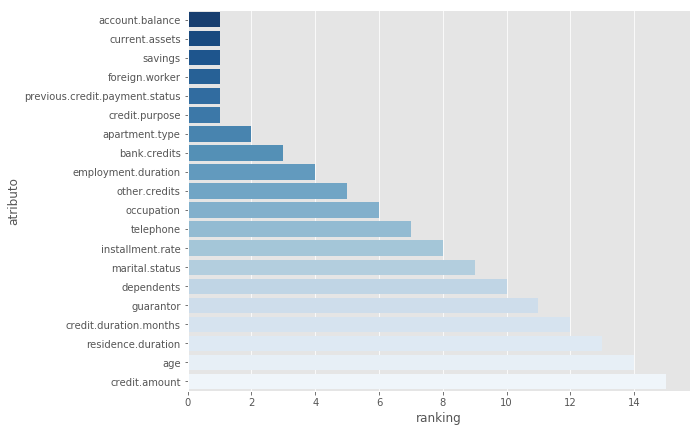

In [59]:
fig = plt.figure(figsize=(9,7))
fig.add_subplot(1,1,1)
plt.style.use('ggplot')
palette = 'Blues_r'
sns.barplot(y='atributo',x='ranking', data=dfrfe, palette=palette)
plt.show()

## Importância dos Atributos - Usando Árvores de Decisão para coletar a importância
## Método Ensemble para Seleção de Variáveis
Bagged Decision Trees, como o algoritmo RandomForest, podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.

Quanto maior o score, maior a importância do atributo.

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
modeloETC = ExtraTreesClassifier()
modeloETC.fit(X, y)
print(modeloETC.feature_importances_)
print(df.columns[1:])

[0.1177 0.0822 0.05   0.0546 0.0898 0.0521 0.0493 0.0519 0.0428 0.024
 0.0559 0.0538 0.068  0.0266 0.0322 0.0302 0.0506 0.0277 0.0331 0.0075]
Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')


In [61]:
tupla = []
for coef, var in sorted(zip(map(abs, modeloETC.feature_importances_), df.columns[1:]), reverse = True):
    print ("%6.3f %s" % (coef,var))
    tupla.append([var,coef])

 0.118 account.balance
 0.090 credit.amount
 0.082 credit.duration.months
 0.068 age
 0.056 residence.duration
 0.055 credit.purpose
 0.054 current.assets
 0.052 savings
 0.052 installment.rate
 0.051 occupation
 0.050 previous.credit.payment.status
 0.049 employment.duration
 0.043 marital.status
 0.033 telephone
 0.032 apartment.type
 0.030 bank.credits
 0.028 dependents
 0.027 other.credits
 0.024 guarantor
 0.008 foreign.worker


### Colocar em Escala

In [62]:
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, model)
Stand_coef_linear_reg.fit(X,y)
tupla = []
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_[0]), df.columns[1:]), reverse = True):
    print ("%6.3f %s" % (coef,var))
    tupla.append([var,coef])

 0.671 account.balance
 0.368 savings
 0.361 previous.credit.payment.status
 0.358 credit.purpose
 0.307 credit.amount
 0.293 installment.rate
 0.277 credit.duration.months
 0.246 foreign.worker
 0.244 current.assets
 0.205 employment.duration
 0.200 marital.status
 0.167 telephone
 0.149 apartment.type
 0.142 other.credits
 0.099 age
 0.094 guarantor
 0.088 bank.credits
 0.054 dependents
 0.040 residence.duration
 0.030 occupation


In [63]:
dfimp2 = pd.DataFrame(tupla,columns=['atributo','importancia'] )
dfimp2

,atributo,importancia
0,account.balance,0.670642
1,savings,0.367625
2,previous.credit.payment.status,0.361119
3,credit.purpose,0.357779
4,credit.amount,0.307470
5,installment.rate,0.292531
6,credit.duration.months,0.276692
7,foreign.worker,0.245588
8,current.assets,0.244202
9,employment.duration,0.205367


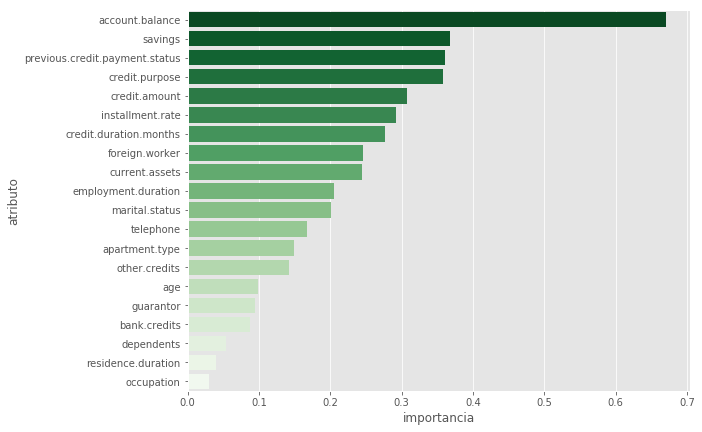

In [64]:
fig = plt.figure(figsize=(9,7))
fig.add_subplot(1,1,1)
plt.style.use('ggplot')
palette = 'Greens_r'
sns.barplot(y='atributo',x='importancia', data=dfimp2, palette=palette)
plt.show()

## Realizando Previsões

In [65]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [66]:
df.loc[0,:].values

array([   1,    1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])

In [67]:
df['account.balance'].value_counts()

3    457
1    274
2    269
Name: account.balance, dtype: int64

In [68]:
df.savings.value_counts()

1    603
4    183
3    111
2    103
Name: savings, dtype: int64

In [69]:
Xprev1 = np.array([3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])
Xprev1

array([   3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [70]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [71]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev1 = standardization.transform(Xprev1)
Xst_prev1

/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.9782, -0.2409,  1.1414,  0.036 , -0.7877, -0.7308,  1.4063,
         0.9185, -1.2863, -0.3202,  1.047 , -0.3411, -1.2816,  0.478 ,
        -1.7512, -0.7614,  0.1469, -0.4283, -0.8233, -0.196 ]])

In [72]:
model2.predict(Xst_prev1)

array([1])

In [73]:
model2.predict_proba(Xst_prev1)

array([[0.2312, 0.7688]])

In [74]:
df.loc[100,:].values

array([   1,    3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])

In [75]:
Xprev2 = np.array([ 3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

array([   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
          1,   40,    2,    2,    1,    3,    1,    2,    1])

In [76]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

array([[   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
           1,   40,    2,    2,    1,    3,    1,    2,    1]])

In [77]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev2 = standardization.transform(Xprev2)
Xst_prev2

/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.9782,  0.257 ,  1.1414, -0.9933,  0.1793,  0.9416, -0.4036,
         0.9185,  0.5888, -0.3202,  1.047 , -1.2937,  0.3929,  0.478 ,
         0.1359, -0.7614,  0.1469, -0.4283,  1.2146, -0.196 ]])

In [78]:
model2.predict(Xst_prev2)

array([1])

In [79]:
model2.predict_proba(Xst_prev2)

array([[0.0525, 0.9475]])

In [80]:
df.loc[5,:].values

array([   1,    1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])

In [81]:
Xprev = np.array([1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

array([   1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,    3,
          1,   48,    2,    1,    2,    2,    2,    1,    2])

In [82]:
Xprev = Xprev.reshape(1, -1)
Xprev

array([[   1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,    3,
           1,   48,    2,    1,    2,    2,    2,    1,    2]])

In [83]:
# Colocando o valor na Escala
Xst_prev = standardization.transform(Xprev)
Xst_prev

/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.4165, -0.9046,  1.1414,  1.0654, -0.3652, -0.7308, -1.3086,
        -1.7645,  0.5888, -0.3202,  0.1405, -1.2937,  1.0979,  0.478 ,
        -1.7512,  1.3133, -1.3838,  2.3349, -0.8233,  5.1017]])

In [84]:
# aplicando o modelo de Regressão Logística
model2.predict(Xst_prev)

array([1])

In [85]:
model2.predict_proba(Xst_prev)

array([[0.1131, 0.8869]])

In [86]:
df.loc[950,:].values

array([   0,    2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])

In [87]:
Xprev3 = np.array([2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])
Xprev3

array([   2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,    2,
          2,   24,    1,    2,    2,    2,    1,    1,    1])

In [88]:
Xprev3 = Xprev3.reshape(1, -1)
Xprev3

array([[   2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,    2,
           2,   24,    1,    2,    2,    2,    1,    1,    1]])

In [89]:
# Colocando o valor na Escala
Xst_prev3 = standardization.transform(Xprev3)
Xst_prev3

/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.2191,  1.9993,  1.1414,  0.036 ,  0.5227, -0.7308, -1.3086,
         0.9185,  0.5888, -0.3202, -0.766 , -0.3411, -1.0172, -2.092 ,
         0.1359,  1.3133, -1.3838, -0.4283, -0.8233, -0.196 ]])

In [90]:
# aplicando o modelo de Regressão Logística
model2.predict(Xst_prev3)

array([0])

In [91]:
model2.predict_proba(Xst_prev3)

array([[0.6849, 0.3151]])

# Métricas para Algorítmos de Classificação

### carregando o dataset

In [92]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [93]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [94]:
X = df.iloc[:,1:].values.astype(float)
y = Y =  df.iloc[:,0]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


## Acurácia
Número de previsões corretas. <br />
É útil apenas quando existe o mesmo número de observações em cada classe.

In [95]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.759 (0.030)


## Curva ROC 
A Curva ROC permite analisar a métrica AUC (Area Under the Curve).<br />
Essa é uma métrica de performance para classificação binária, em que podemos definir as classes 
em positivas e negativas. <br />
Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity. <br />
Sensitivity é a taxa de verdadeiros positivos (TP). Esse é o número de instâncias positivas da primeira classe 
que foram previstas corretamente. <br />
Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram 
previstas corretamente.<br />
Valores acima de 0.5 indicam uma boa taxa de previsão.

In [96]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

AUC: 0.778 (0.041)


# Logarithmic Loss
Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.<br />
Valores menores indicam boa performance, com 0 representando um perfeito logloss.<br /> 
A função cross_val_score() inverte o valor.

In [97]:
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

# Print do resultado
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Logloss: -0.502 (0.035)


## Confusion Matrix
Permite verificar a acurácia de um modelo com duas ou mais classes

In [98]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

[[ 43  62]
 [ 16 209]]


Matriz de Confusão


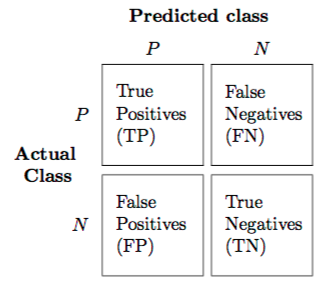

In [99]:
from IPython.display import Image
print("Matriz de Confusão")
Image("confusion_matrix.png")

## Relatório de Classificação

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas? <br />
$\text{Precision} = \frac{TP}{TP+FP}$
<br /><br />
Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?<br />
$\text{Recall} = \frac{TP}{TP+FN}$
<br /><br />
f1-score: f1-score combina as métricas de precision e recall<br /><br />
$\text{f1-score} = \frac{2 * (precision * recall)}{(precision + recall)}$
<br /><br />
O f1-score pode ser interpretado com a média ponderada entre precision e recall,<br />
onde o f1-score encontra seu melhor valor ao atingir 1, e seu pior valor ao atingir 0<br /><br />
Support: Número de instâncias

## Relatório de Classificação

In [100]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

           0       0.73      0.41      0.52       105
           1       0.77      0.93      0.84       225

   micro avg       0.76      0.76      0.76       330
   macro avg       0.75      0.67      0.68       330
weighted avg       0.76      0.76      0.74       330



In [101]:
# Imprimindo a Confusion Matrix
print(matrix)

[[ 43  62]
 [ 16 209]]
